# Apply Kirchhof transform to van Genuchten model

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing
#init_printing(use_latex=True)
init_printing(use_latex='mathjax')

from IPython.display import display, Latex

# Define symbols
S, h, alpha, n, Ks, lam = sp.symbols('S h alpha n Ks lambda')

# Parameters for the van Genuchten model (typical values)
alpha_val = 0.033  # 1/cm
n_val = 1.5
m = 1 - 1/n
Ks_val = 1.0  # cm/day
lam_val = 0.5  # typical value for lambda

# Define the van Genuchten S(h)
S_h = (1 / (1 + (alpha * h)**n))**m

# Define K(S)
K_S = Ks * S**lam * (1 - (1 - S**(1/m))**m)**2

# Inverse function h(S)
h_S = -1/alpha * ((1/S)**(1/m) - 1)**(1/n)

# Derivative of h(S)
h_S_prime = sp.diff(h_S, S)

# Define f(S)
f_S = K_S * h_S_prime
simple_f_S = sp.simplify(f_S)
#display(Latex(sp.latex(simple_f_S)))

# Display as LaTeX
#display(Latex(f_S))
display(simple_f_S)


                                 2               1 - n         
          ⎛            n - 1    ⎞                ─────         
          ⎜            ─────    ⎟                  n           
          ⎜              n      ⎟  ⎛     n      ⎞           n  
          ⎜⎛       n  ⎞         ⎟  ⎜   ─────    ⎟         ─────
          ⎜⎜     ─────⎟         ⎟  ⎜   n - 1    ⎟         n - 1
    λ - 1 ⎜⎜     n - 1⎟         ⎟  ⎜⎛1⎞         ⎟      ⎛1⎞     
Ks⋅S     ⋅⎝⎝1 - S     ⎠      - 1⎠ ⋅⎜⎜─⎟      - 1⎟     ⋅⎜─⎟     
                                   ⎝⎝S⎠         ⎠      ⎝S⎠     
───────────────────────────────────────────────────────────────
                           α⋅(n - 1)                           

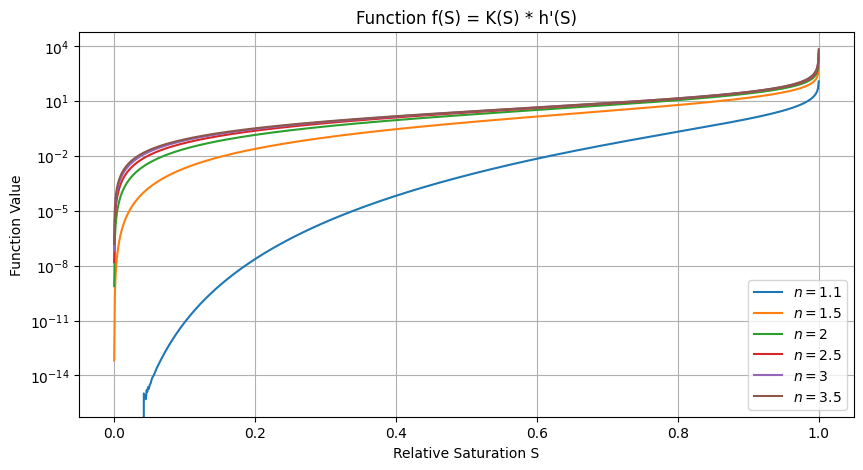

In [18]:



# Plot f(S)
eps = 1e-4
S_vals = np.linspace(eps, 1-eps, 1000)
f_S_func = sp.lambdify([S, n], simple_f_S.subs({alpha: alpha_val, Ks: Ks_val, lam: lam_val}), 'numpy')


plt.figure(figsize=(10, 5))
for n_val in [1.1, 1.5, 2, 2.5, 3, 3.5]:
    f_S_vals = f_S_func(S_vals, n_val)
    plt.plot(S_vals, f_S_vals, label=f'$n={n_val}$')
plt.xlabel('Relative Saturation S')
plt.ylabel('Function Value')
plt.yscale('log')
plt.title('Function f(S) = K(S) * h\'(S)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:

# Plot integral of f(S) from 0 to S
f_S_integrated = sp.integrate(simple_f_S, (S, 0, S))
f_S_integrated_func = sp.lambdify(S, f_S_integrated.subs({alpha: alpha_val, n: n_val, m: m_val, Ks: Ks_val, lam: lam_val}), 'numpy')
f_S_integrated_vals = f_S_integrated_func(S_vals)

plt.figure(figsize=(10, 5))
plt.plot(S_vals, f_S_integrated_vals, label='Integral of f(S) from 0 to S')
plt.xlabel('Relative Saturation S')
plt.ylabel('Integrated Function Value')
plt.title('Integral of f(S) from 0 to S')
plt.legend()
plt.grid(True)
plt.show()